In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd

In [2]:
noise_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [3]:
nonCS_means_over_runs = []
CS_means_over_runs = []

for agent_run_no in [0,1,3,4]:
    means = np.load(f"noncsmeans_{agent_run_no}.npy")
    nonCS_means_over_runs.append(means)

    mean_s = np.load(f"csmeans_{agent_run_no}.npy")
    CS_means_over_runs.append(mean_s)

In [4]:
nonCS_means_over_runs = np.array(nonCS_means_over_runs).reshape(-1, len(noise_list))
CS_means_over_runs = np.array(CS_means_over_runs).reshape(-1, len(noise_list))

In [5]:
nonCS_means_over_runs.shape

(20, 9)

In [6]:
nonCS_final_means = np.mean(nonCS_means_over_runs, axis=0)
nonCS_final_stds = np.std(nonCS_means_over_runs, axis=0)
CS_final_means = np.mean(CS_means_over_runs, axis=0)
CS_final_stds = np.std(CS_means_over_runs, axis=0)

In [7]:
nonCS_final_means

array([ 267.70542238,  219.52696068,  118.74663074,    9.63768858,
        -43.90382869,  -88.2394022 , -107.02793287, -109.11791588,
       -109.9982043 ])

In [8]:
CS_final_means

array([267.70542238, 261.75610108, 269.30834275, 262.14755758,
       259.50818155, 254.38779424, 246.94776845, 198.39773576,
       102.75561165])

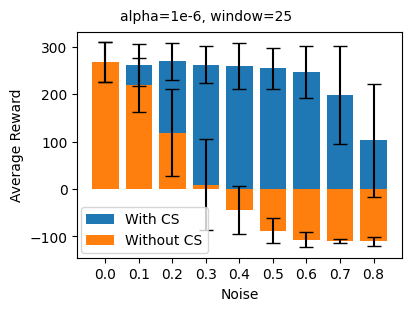

In [11]:
fig_width = 4
fig_height = 3
fig, axes = plt.subplots(nrows=1, 
                         ncols=1,
                         figsize=[fig_width,fig_height],
                         layout='constrained',
                         sharex=not True,
                         sharey=not True)

axes.bar(np.arange(len(noise_list)), CS_final_means, yerr=CS_final_stds, align='center', ecolor='black', capsize=5, label="With CS")
axes.bar(np.arange(len(noise_list)), nonCS_final_means, yerr=nonCS_final_stds, align='center', ecolor='black', capsize=5, label="Without CS")

axes.set(xlabel="Noise", ylabel="Average Reward")
axes.set_xticks(np.arange(len(noise_list)), noise_list)

fig.suptitle(f'alpha=1e-6, window=25', fontsize='medium');
fig.legend(ncols=1, bbox_to_anchor=(0.17, 0.15), loc='lower left');


In [12]:
fig.savefig("alpha6win25.png")